In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
cols = ['แรงม้า','เงินทุนรวม','คนงานรวม']
dataset = pd.read_csv('worker_no_outlier.csv',encoding='utf-8',usecols=cols)
dataset

,เงินทุนรวม,คนงานรวม,แรงม้า
0,20000000.0,5.0,270.68
1,43100000.0,10.0,356.00
2,8035000.0,1.0,83.05
3,5500000.0,13.0,191.00
4,6000000.0,25.0,167.25
...,...,...,...
1579,3600000.0,6.0,178.00
1580,8000000.0,18.0,83.00
1581,15700000.0,8.0,301.29
1582,45000000.0,15.0,278.50


In [31]:
dataset.describe()

,เงินทุนรวม,คนงานรวม,แรงม้า
count,1.584000e+03,1584.000000,1584.000000
mean,1.157815e+07,11.446740,248.590295
std,1.004636e+07,5.856724,199.268919
min,1.500000e+05,1.000000,15.200000
25%,4.087500e+06,7.000000,96.395000
50%,8.250000e+06,10.000000,180.000000
75%,1.572500e+07,15.000000,333.317500
max,4.540750e+07,29.000000,997.000000


In [32]:
dataset.mode()

,เงินทุนรวม,คนงานรวม,แรงม้า
0,5000000.0,10.0,90.0


In [33]:
Q1_horsepower = dataset['แรงม้า'].quantile(0.25)
Q3_horsepower = dataset['แรงม้า'].quantile(0.75)
Q1_horsepower,Q3_horsepower

(96.395, 333.3175)

In [34]:
IQR_horsepower = Q3_horsepower - Q1_horsepower
IQR_horsepower

236.9225

In [35]:
lower_outlier_horsepower = Q1_horsepower - 1.5*IQR_horsepower
upper_outlier_horsepower = Q3_horsepower + 1.5*IQR_horsepower
lower_outlier_horsepower, upper_outlier_horsepower

(-258.98875000000004, 688.7012500000001)

In [36]:
dataset[(dataset['แรงม้า'] < lower_outlier_horsepower)|(dataset['แรงม้า'] > upper_outlier_horsepower)]

,เงินทุนรวม,คนงานรวม,แรงม้า
8,16500000.0,14.0,815.00
10,41000000.0,15.0,760.00
13,16000000.0,21.0,750.00
21,13000000.0,14.0,766.34
31,2700000.0,15.0,836.50
...,...,...,...
1502,30000000.0,22.0,925.75
1517,31000000.0,15.0,720.00
1541,40000000.0,25.0,754.50
1545,8950000.0,12.0,867.00


In [37]:
dataset[(dataset['แรงม้า'] > lower_outlier_horsepower) & (dataset['แรงม้า'] < upper_outlier_horsepower)]

,เงินทุนรวม,คนงานรวม,แรงม้า
0,20000000.0,5.0,270.68
1,43100000.0,10.0,356.00
2,8035000.0,1.0,83.05
3,5500000.0,13.0,191.00
4,6000000.0,25.0,167.25
...,...,...,...
1579,3600000.0,6.0,178.00
1580,8000000.0,18.0,83.00
1581,15700000.0,8.0,301.29
1582,45000000.0,15.0,278.50


In [38]:
horsepower_no_outlier = dataset[(dataset['แรงม้า'] > lower_outlier_horsepower) & (dataset['แรงม้า'] < upper_outlier_horsepower)]
horsepower_no_outlier

,เงินทุนรวม,คนงานรวม,แรงม้า
0,20000000.0,5.0,270.68
1,43100000.0,10.0,356.00
2,8035000.0,1.0,83.05
3,5500000.0,13.0,191.00
4,6000000.0,25.0,167.25
...,...,...,...
1579,3600000.0,6.0,178.00
1580,8000000.0,18.0,83.00
1581,15700000.0,8.0,301.29
1582,45000000.0,15.0,278.50


In [39]:
horsepower_no_outlier.describe()

,เงินทุนรวม,คนงานรวม,แรงม้า
count,1.514000e+03,1514.000000,1514.000000
mean,1.121034e+07,11.321424,221.513156
std,9.757730e+06,5.798987,156.663836
min,1.500000e+05,1.000000,15.200000
25%,4.000000e+06,7.000000,95.000000
50%,8.000000e+06,10.000000,171.750000
75%,1.500000e+07,15.000000,296.850000
max,4.540750e+07,29.000000,686.500000


In [40]:
horsepower_no_outlier.mode()

,เงินทุนรวม,คนงานรวม,แรงม้า
0,10000000.0,10.0,90.0


In [41]:
horsepower_no_outlier.to_csv(r'./hp_no_outlier.csv')

C:\Users\LENOVO LEGION\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='แรงม้า'>

C:\Users\LENOVO LEGION\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 3649 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\LENOVO LEGION\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 3619 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\LENOVO LEGION\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 3591 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\LENOVO LEGION\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 3617 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\LENOVO LEGION\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 3657 missing f

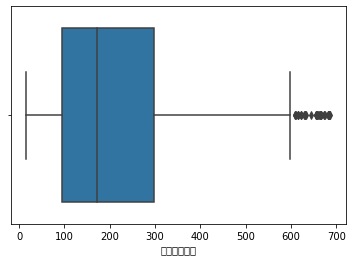

In [42]:
sns.boxplot(horsepower_no_outlier['แรงม้า'])